## CS 457 - Homework Assignment 9: Classification
## Dua Batool

In [2]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('CreditCardData.csv')

In [4]:
df.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


### Q1: Remove all rows with missing values

In [5]:
# representing the missing values with nan instead of '?'
df = df.replace('?', np.nan)

df = df.dropna()

In [6]:
df

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


### Q2: Replacing 'Approved' column

In [7]:
df["Approved"] = df["Approved"].replace(["+", "-"], ["Yes", "No"])

In [8]:
df['Approved']

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
685     No
686     No
687     No
688     No
689     No
Name: Approved, Length: 653, dtype: object

### Q3: Creating a train and test set

In [9]:
df1 = pd.get_dummies(df, columns = ['ZipCode','Male','Married','BankCustomer','EducationLevel','Ethnicity','PriorDefault','Employed','DriversLicense','Citizen'])

In [10]:
X = df1.drop(['Approved'],axis=1)
Y = df1['Approved']

In [11]:
X

,Age,Debt,YearsEmployed,CreditScore,Income,ZipCode_0,ZipCode_100,ZipCode_102,ZipCode_108,ZipCode_110,...,Ethnicity_z,PriorDefault_f,PriorDefault_t,Employed_f,Employed_t,DriversLicense_f,DriversLicense_t,Citizen_g,Citizen_p,Citizen_s
0,30.83,0.000,1.25,1,0,0,0,0,0,0,...,0,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.04,6,560,0,0,0,0,0,...,0,0,1,0,1,1,0,1,0,0
2,24.5,0.500,1.50,0,824,0,0,0,0,0,...,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.75,5,3,0,1,0,0,0,...,0,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
686,22.67,0.750,2.00,2,394,0,0,0,0,0,...,0,1,0,0,1,0,1,1,0,0
687,25.25,13.500,2.00,1,1,0,0,0,0,0,...,0,1,0,0,1,0,1,1,0,0
688,17.92,0.205,0.04,0,750,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0


In [12]:
Y

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
685     No
686     No
687     No
688     No
689     No
Name: Approved, Length: 653, dtype: object

### Q4: Setting the seed - random_state = 10

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [14]:
X_train.head()

,Age,Debt,YearsEmployed,CreditScore,Income,ZipCode_0,ZipCode_100,ZipCode_102,ZipCode_108,ZipCode_110,...,Ethnicity_z,PriorDefault_f,PriorDefault_t,Employed_f,Employed_t,DriversLicense_f,DriversLicense_t,Citizen_g,Citizen_p,Citizen_s
255,18.17,10.250,1.085,0,13,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
619,18.42,10.415,0.125,0,375,0,0,0,0,0,...,0,0,1,1,0,1,0,1,0,0
516,60.92,5.000,4.000,4,99,1,0,0,0,0,...,0,0,1,0,1,1,0,1,0,0
449,20,7.000,0.500,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
623,18.83,0.000,0.665,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0


In [15]:
y_train.head()

255     No
619     No
516    Yes
449     No
623     No
Name: Approved, dtype: object

### Q5: Classification model to predict 'Approved' using Decision Tree

In [16]:
dt = tree.DecisionTreeClassifier(random_state=10)
dtmodel = dt.fit(X_train, y_train)

In [17]:
train_pred = dtmodel.predict(X_train)

In [18]:
train_pred

array(['No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Ye

In [19]:
acc = (accuracy_score(train_pred, y_train))*100
acc

100.0

In [20]:
test_pred = dtmodel.predict(X_test)

In [21]:
test_pred

array(['No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes

In [22]:
acc = (accuracy_score(test_pred, y_test))*100
acc

82.14285714285714

The training accuracy is 100% and test accuracy is 82.1%

There are lot of columns that are not affecting our prediction so its overfitting. Training accuracy being 100% is a sign of overfitting.

**Visualizing the tree**

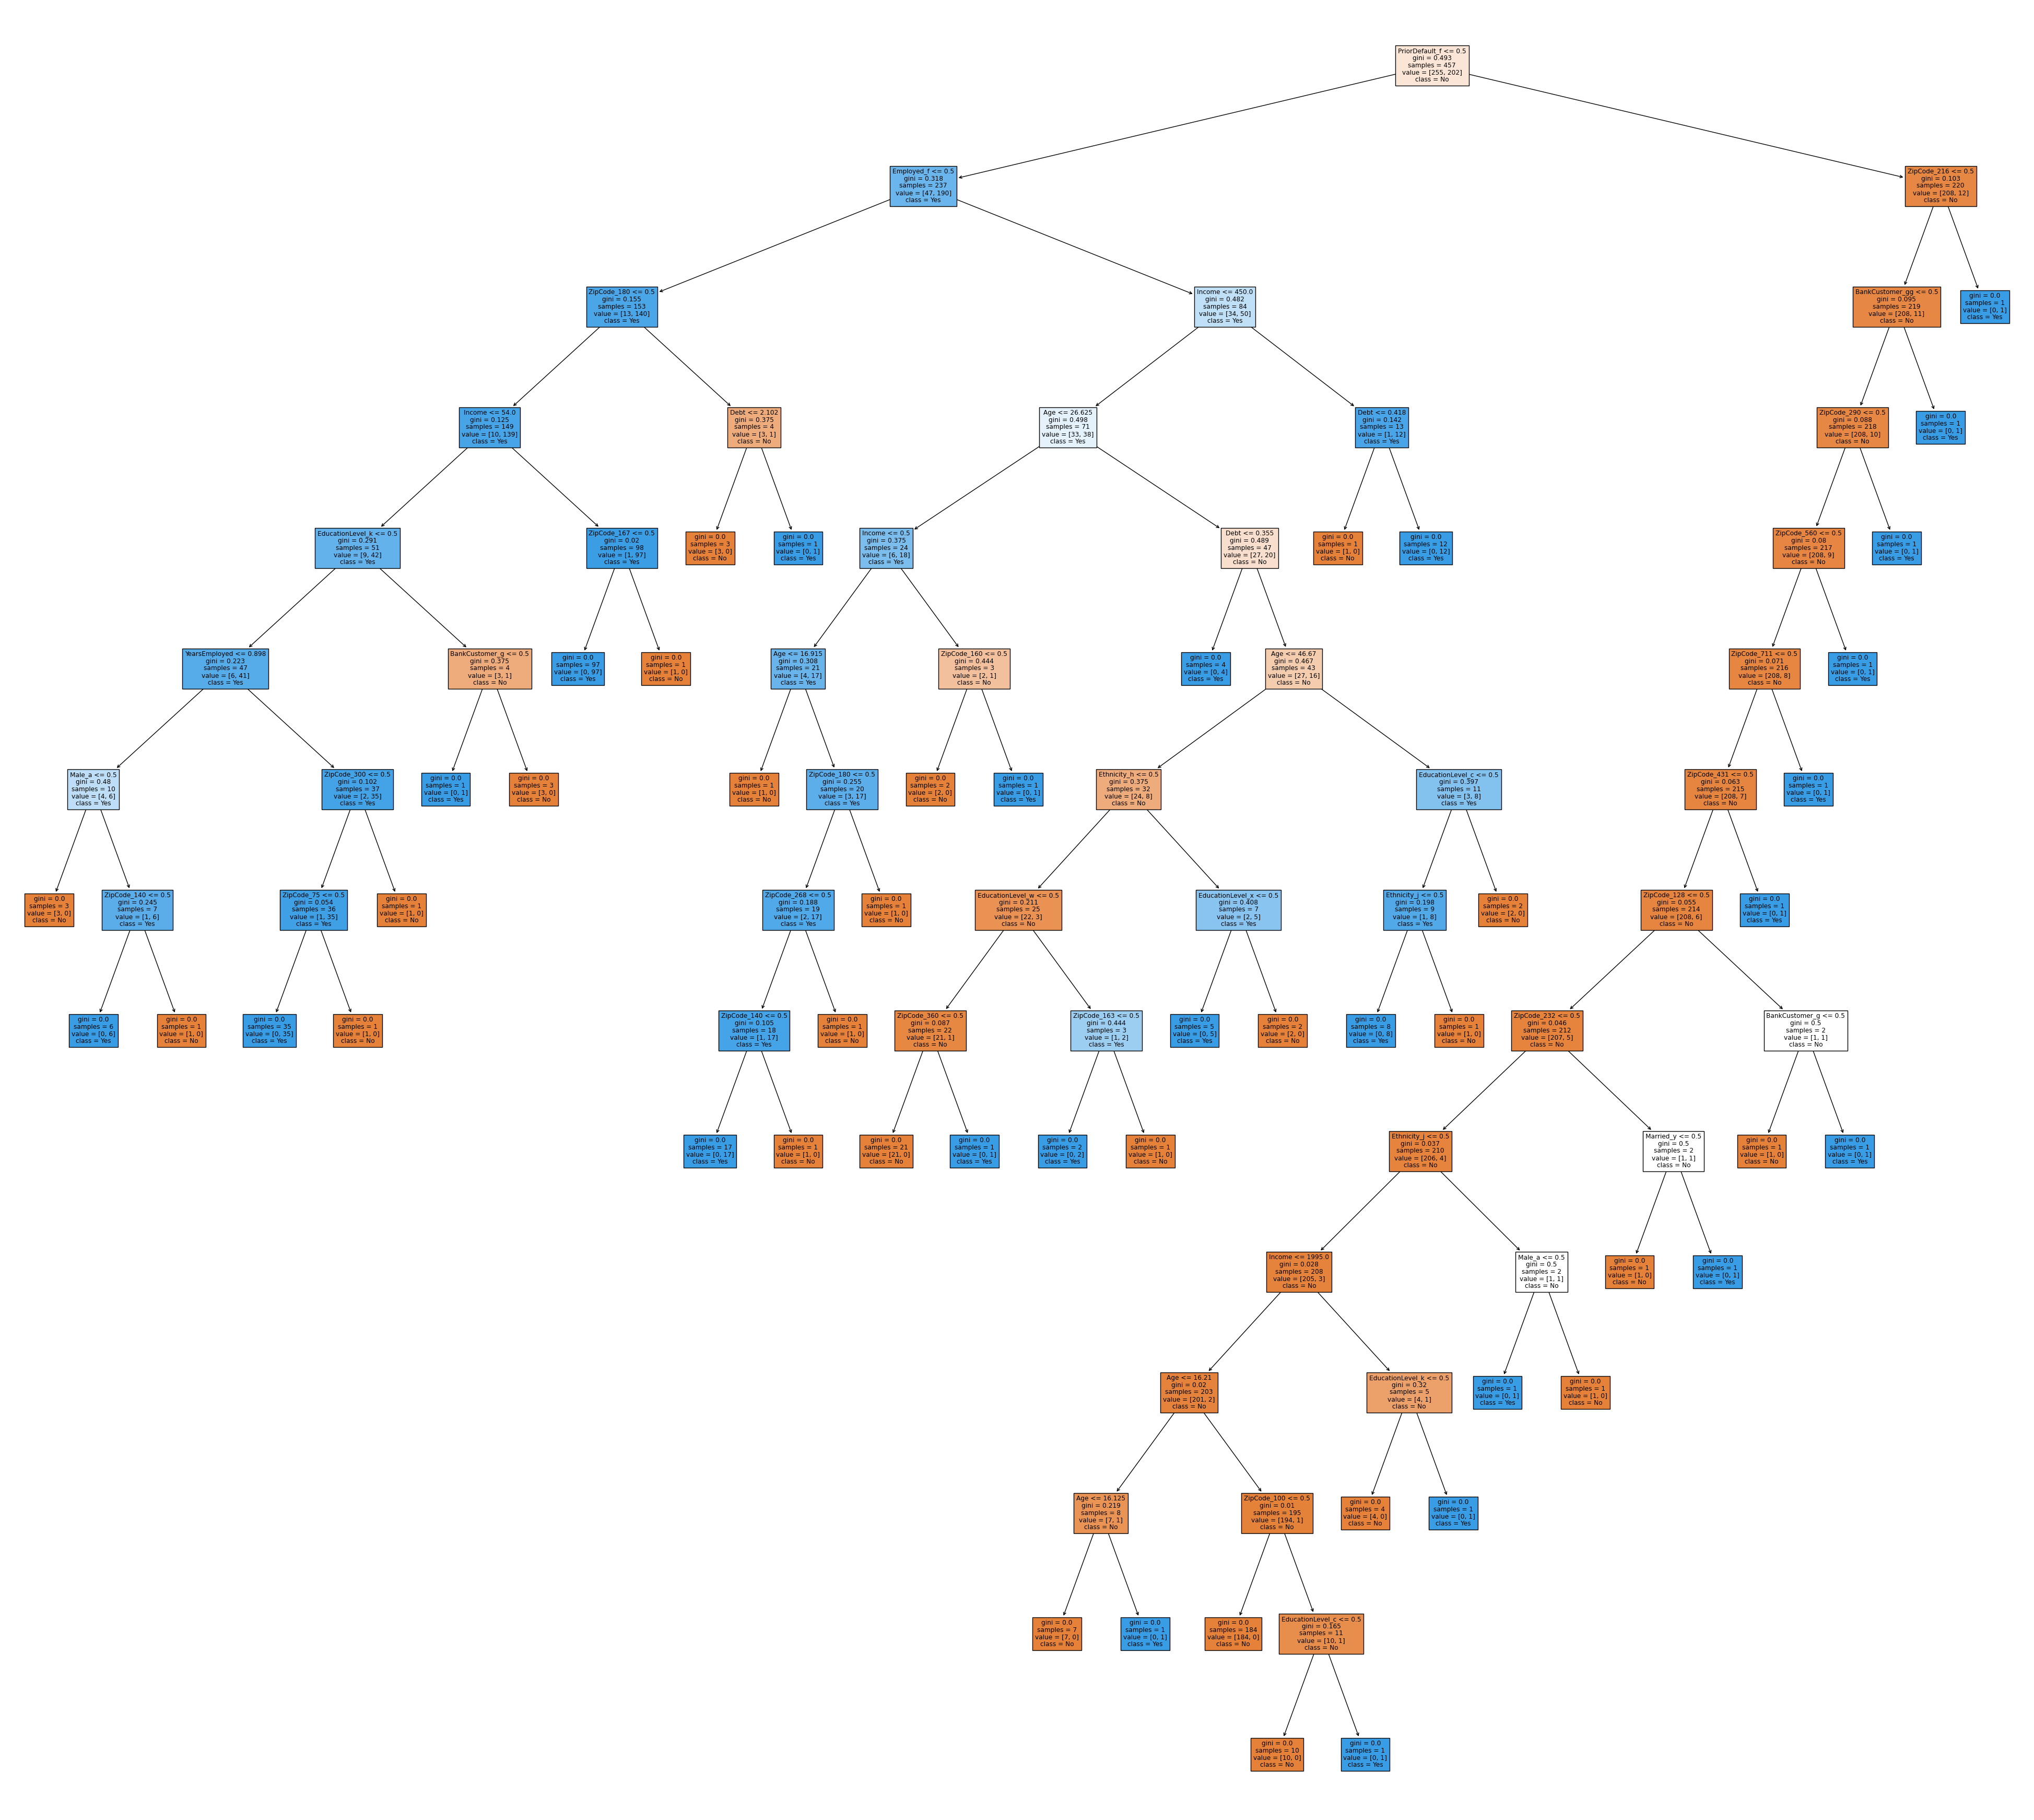

In [23]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel, 
                   feature_names=list(X.columns),  
                   class_names=list(Y.value_counts().index),
                   filled=True)

In [24]:
fig.savefig('decision_tree.png')

The most important attribute is the root node. As we go down the tree, the significance of the attributes decreases. The least significant attributes are the ones which are at the bottom of the tree.

root node = most important column = PriorDefault_f

### Q6: Tree Pruning Analysis

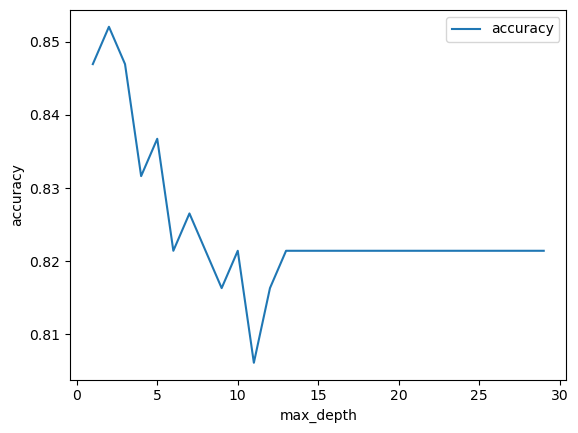

In [25]:
max_depth = []
acc = []
for i in range(1,30):
    dtree = tree.DecisionTreeClassifier(max_depth = i, random_state = 10)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc.append(accuracy_score(y_test, pred))
    max_depth.append(i)
    
d = pd.DataFrame({'accuracy':pd.Series(acc),'max_depth':pd.Series(max_depth)})

plt.plot(d['max_depth'].values,d['accuracy'].values)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(["accuracy"])

In [29]:
# selected max_depth = 3  because it gives the highest test accuracy
dt = tree.DecisionTreeClassifier(max_depth = 3, random_state = 10) 

In [30]:
dtmodel = dt.fit(X_train, y_train)
train_pred = dtmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

87.96498905908096

In [31]:
test_pred = dtmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

84.6938775510204

We have overcome the overfitting problem as the accuracy of train_pred is now 87.9% instead of 100%.

We also got a better result for test_pred. Before Pruning it was 82.1% and now it is 84.6%.

So Pruning not only solved the overfitting problem but also improved the test accuracy.

**Visualizing the tree**

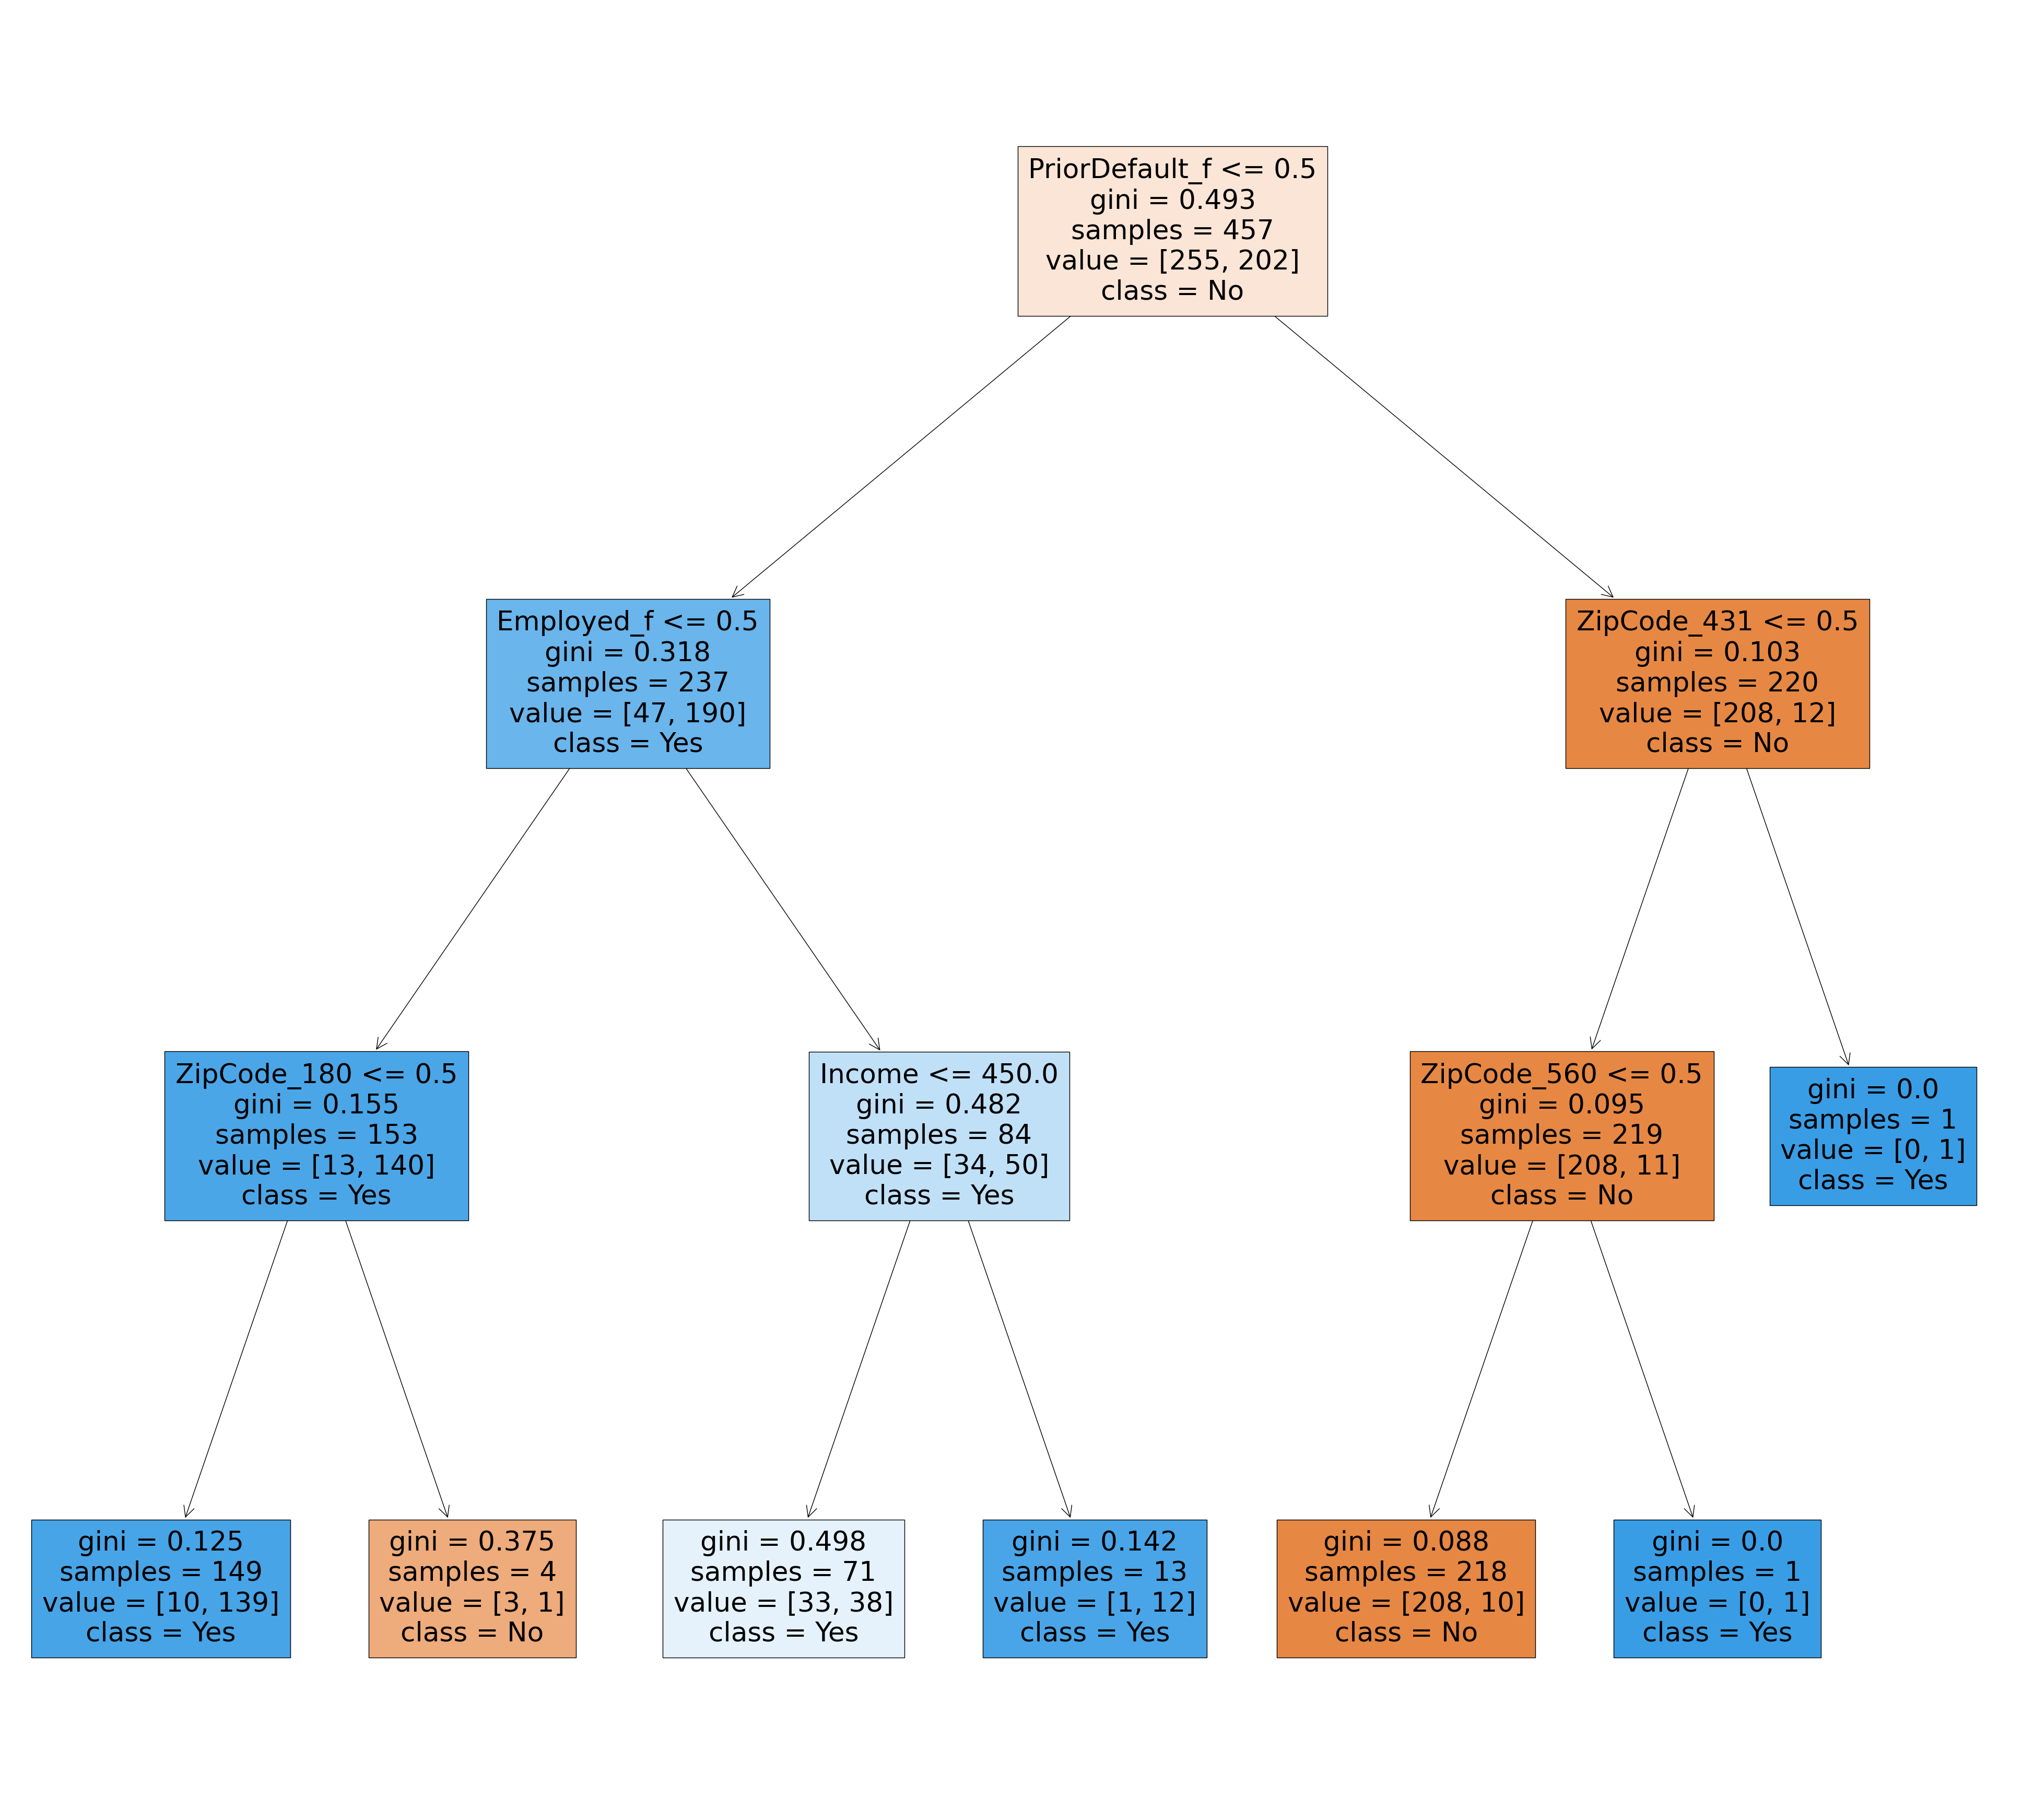

In [32]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel, 
                   feature_names=list(X.columns),  
                   class_names=list(Y.value_counts().index),
                   filled=True)

Before Pruning, we had a large tree which also showed us most unsignificant attributes. After Pruning, we now have a tree with the depth of 3 that shows us only the most significant attributes.

### Q7: Classification model to predict 'Approved' using Random Forest

In [104]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 9)

In [105]:
rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [106]:
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

88.26530612244898

In [92]:
rfmodel.feature_importances_

array([4.98494656e-02, 5.31080370e-02, 8.17872975e-02, 7.22752451e-02,
       5.70582409e-02, 1.43841990e-02, 6.75986113e-03, 0.00000000e+00,
       8.23666986e-05, 8.82333216e-04, 6.88426953e-04, 1.18842024e-05,
       2.95063323e-03, 0.00000000e+00, 2.60167646e-03, 2.49755855e-04,
       5.23442379e-04, 1.73666061e-03, 1.93893267e-04, 2.36774586e-03,
       1.35779385e-04, 2.21973875e-04, 6.15248114e-05, 3.97840795e-05,
       0.00000000e+00, 8.71114446e-04, 1.33034282e-04, 4.76646343e-03,
       7.49197950e-04, 4.44691250e-04, 1.55365799e-03, 2.01074109e-04,
       3.62725617e-07, 3.37395919e-05, 4.53688829e-04, 2.44122088e-05,
       1.86254808e-03, 0.00000000e+00, 4.99873276e-03, 2.15181527e-04,
       1.15382219e-04, 0.00000000e+00, 3.75984732e-04, 6.17728064e-05,
       3.83048553e-03, 1.02144996e-04, 2.10013234e-04, 1.90318129e-04,
       0.00000000e+00, 5.70191525e-04, 3.24059656e-05, 3.74128678e-04,
       1.01089754e-03, 2.67774149e-03, 2.82979126e-05, 4.20908877e-04,
      

**n_Estimator = 80**

In [93]:
rf = RandomForestClassifier(n_estimators = 80, random_state = 8)

rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [94]:
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

87.75510204081633

**n_Estimator = 60**

In [95]:
rf = RandomForestClassifier(n_estimators = 60, random_state = 7)

rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [96]:
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

86.73469387755102

**n_Estimator = 40**

In [97]:
rf = RandomForestClassifier(n_estimators = 40, random_state = 11)

rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [98]:
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

86.22448979591837

**n_Estimator = 20**

In [99]:
rf = RandomForestClassifier(n_estimators = 20, random_state = 4)

rfmodel = rf.fit(X_train, y_train)
train_pred = rfmodel.predict(X_train)
acc = accuracy_score(train_pred, y_train)
acc*100

100.0

In [100]:
test_pred = rfmodel.predict(X_test)
acc = accuracy_score(test_pred, y_test)
acc*100

85.20408163265306

**Comparision**

the best model is with n-estimator = 100 since it has the best train_pred accuracy and test_pred accuracy (least classification error) out of the other models. We can also note that as estimators decrease the test prediction is also decreasing.

**Variable Importance Plot - Plotting only 10 most significant features**

Importance Plot for n-estimator = 100 

In [74]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 9)
rfmodel = rf.fit(X_train, y_train)

Text(0.5, 0, 'Random Forest Feature Importance')

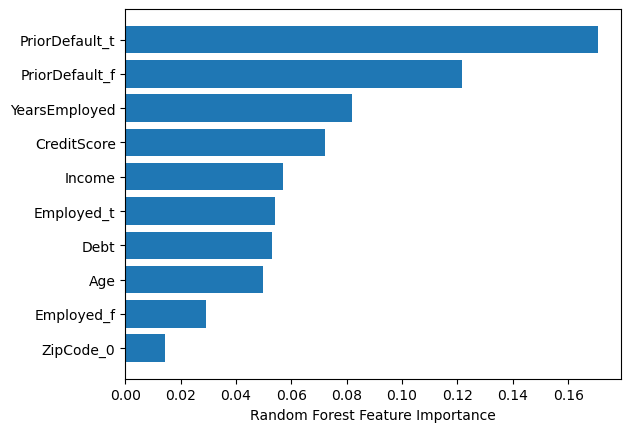

In [75]:
sorted_idx = rfmodel.feature_importances_.argsort()
sorted_idx = sorted_idx[-10:]
plt.barh(list(X.columns[sorted_idx]), rfmodel.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

we can see from the graph that PriorDefault_t is most significant attribute

### Q7: Comparision between Decision Trees and Random Forest

**Decision Tree cross_val_score**

In [76]:
score = cross_val_score(dtmodel, X, Y, cv= 5)
score.mean()

0.8223370522607164

**Random Forest cross_val score**

In [83]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 9)   # picking the best for comparision
rfmodel = rf.fit(X_train, y_train)

In [84]:
score = cross_val_score(rfmodel, X,Y,cv=5)
score.mean()

0.8483969465648855

The accuracy of random forest is 0.848 which is better than the accuracy of decision tree which is 0.822. Hence, the random forest model is better than decision tree in terms of accuracy.

**Decision Tree confusion_matrix**

In [85]:
train_pred = dtmodel.predict(X_train)
test_pred = dtmodel.predict(X_test)

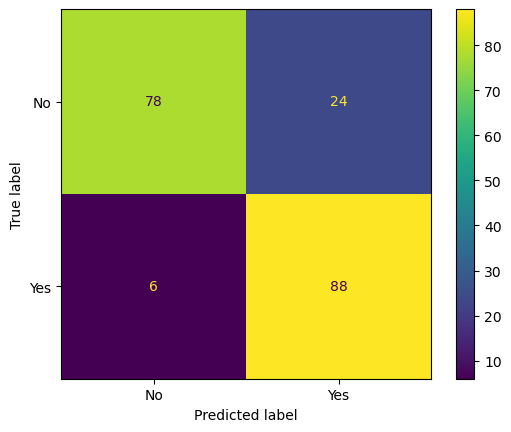

In [86]:
cm2 = confusion_matrix(y_test,test_pred)
cp = ConfusionMatrixDisplay(cm2,display_labels=dtmodel.classes_)
cp.plot()

**Random Forest confusion_matrix**

In [87]:
train_pred = rfmodel.predict(X_train)
test_pred = rfmodel.predict(X_test)

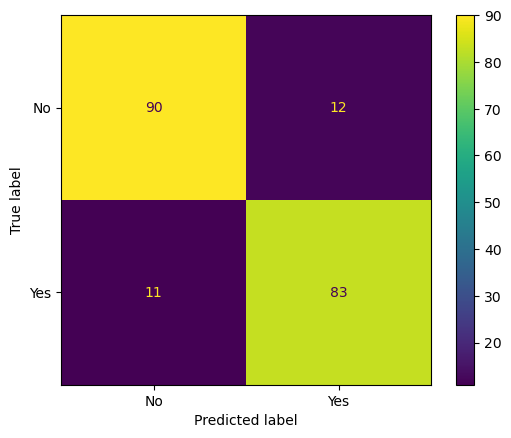

In [88]:
cm2 = confusion_matrix(y_test,test_pred)
cp = ConfusionMatrixDisplay(cm2,display_labels=rfmodel.classes_)
cp.plot()

Decision Tree predicted 78 'No' correctly and 88 'Yes' correctly while Random Forest predicted 90 'No' correctly and 83 'Yes' correctly. Random Forest is a better model because it has more correct predictions than decsion tree.

### Part 2: Recommendation

In [316]:
df = pd.read_csv('mcdonalds.csv')

In [317]:
df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,95,1110,44,3,11,37,4,20,20
1,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,155,1940,62,2,18,55,6,25,20
2,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,120,1980,81,4,18,46,6,20,20
3,Mcdonalds,Big Mac,540,250,28,10.0,80,950,46,3,9,25,10,2,15
4,Mcdonalds,Cheeseburger,300,100,12,5.0,40,680,33,2,7,15,10,2,10


In [318]:
X = df.drop(['restaurant', 'item'], axis=1)
Y = df['item']

In [319]:
dt2 = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=2, min_samples_leaf=1,random_state=10)

In [320]:
dtmodel2 = dt2.fit(X, Y)

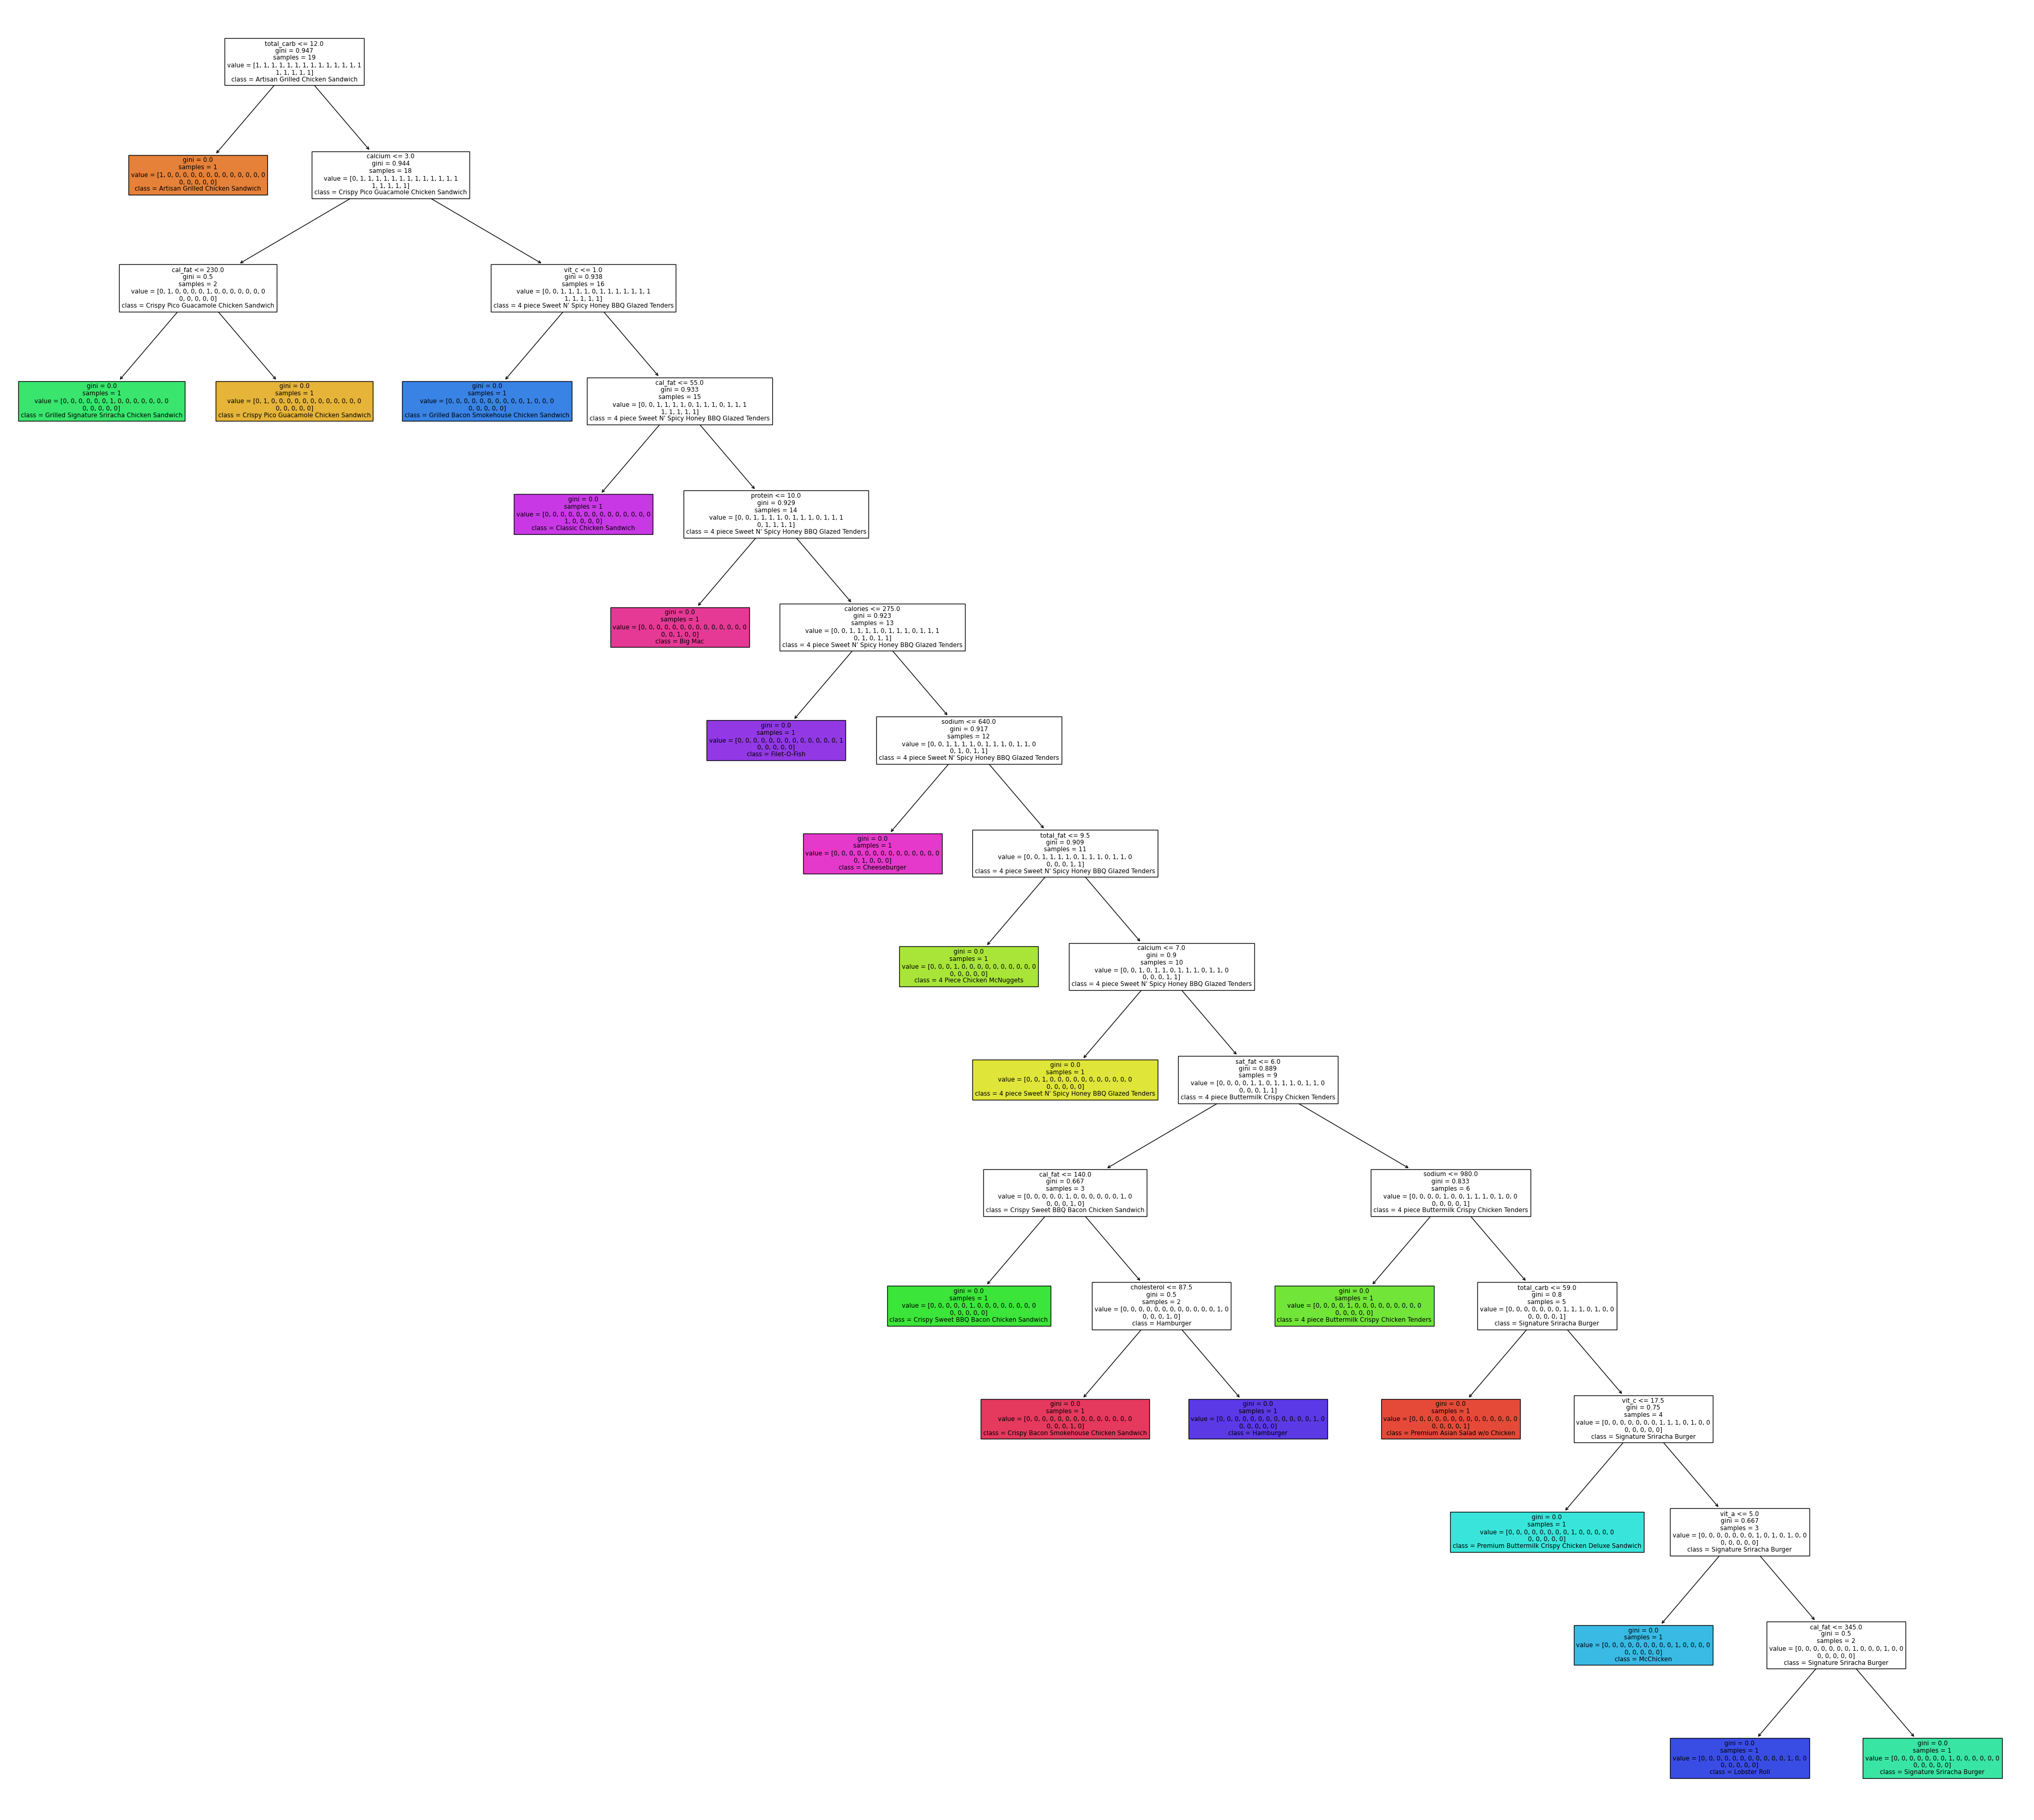

In [321]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel2,  
                   feature_names=list(X.columns),  
                   class_names=list(Y.value_counts().index), 
                   filled=True)

In [322]:
fig.savefig("mcdonalds.png")

most important column = root node = total_carb

the least significant are branch attributes like lobstar roll.

**3 Similar Foods**

- "Grilled Signature Siracha Chicken Sandwich" and "Crispy Pico Guacamole Chicken Sandwich"
- "Lobster Roll" and "Signature Siracha Burger"
- "Hamburger" and "Crispy Bacon Smokehouse Chicken Sandwich"
